torch.Size([1, 1, 100, 100])
(1, 1, 2, 2)
[[[[20. 20.]
   [80. 20.]]]]
torch.Size([1, 1, 1, 2])
tensor([[[[1., 0.]]]])


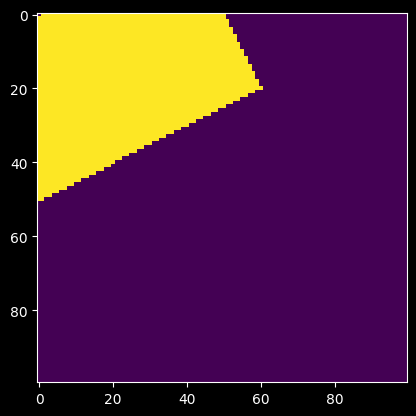

In [1]:
from PIL import Image, ImageDraw, ImageOps, ImageFont
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch


size = (100,100)
img_wp = Image.new('L', size)
draw_wp = ImageDraw.Draw(img_wp)
draw_wp.line((0,0,20,40), fill=1, width=90)
N = 1
C = 1
img_ = np.array(img_wp)
img = img_.reshape(N,C,100,100).astype(np.float32)
img = torch.tensor(img)
print(img.shape)
p = np.array([[20,20],[80,20]]).astype(np.float32)
p = p.reshape(N,1,2,2)
# 1表示的是query
# 第1个2表示点的个数
print(p.shape)
print(p)
p[...,0] /= 100
p[...,1] /= 100
p = (p - 0.5)*2
p = torch.tensor(p)
sampled_feat = F.grid_sample(img, p, align_corners=False)
print(sampled_feat.shape)
print(sampled_feat)
plt.imshow(img_)
# (N,C,1,2)b

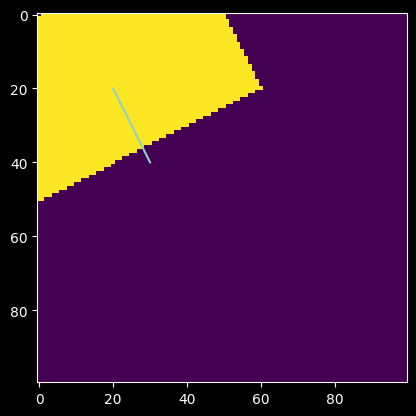

In [3]:
pos = (20,20)
pos2 = (30,40)
plt.imshow(img_)
plt.plot((pos[0],pos2[0]),(pos[1],pos2[1]))

In [4]:
#!/usr/bin/python
#!/usr/bin/env python
#-*- coding:UTF-8 -*-
#from tqdm import tqdm
import mmcv
import numpy as np
import io
import cv2
import time
from petrel_client.client import Client
conf_path = '~/petreloss.conf'
#conf_path = '~/.s3cfg'
client = Client(conf_path)
t1=time.time()
img = []
img_url = 's3://tr_plan_hrz/l6_dataset/Routes_l6_dataset/longest_weathers_0_route0_01_04_22_32_19/rgb/1277.png'
# img_bytes = client.get(img_url)
# img_array = np.frombuffer(img_bytes, np.uint8)
# img_i = cv2.imdecode(img_array, cv2.IMREAD_COLOR)
img_bytes = client.get(img_url)
img = mmcv.imfrombytes(img_bytes)
print(img.shape)

# 's3://tr_plan_hrz/rr_dataset/Routes_Town06_rr/Town06_rr_route5_12_28_07_34_00/rgb/0005.png'

(256, 900, 3)


In [3]:
from mmcv.parallel import DataContainer as DC
import mmcv
import numpy as np

class LoadImageFromCeph:
    def __init__(self, file_client_args=dict(backend='petrel')):
        self.file_client_args = file_client_args.copy()
    def __call__(self, img_path):
        self.file_client = mmcv.FileClient(**self.file_client_args)
        img_bytes = self.file_client.get(img_path)
        img = mmcv.imfrombytes(img_bytes)
        return img
load_img = LoadImageFromCeph()
img = load_img('s3://tr_plan_hrz/l6_dataset/Routes_l6_dataset/longest_weathers_0_route0_01_04_22_32_19/rgb/1277.png')
print(img.shape)

(256, 900, 3)


In [5]:
import time
print(time.strftime('%Y-%m-%d_%H:%M:%S'))
import os.path as osp
osp.splitext(osp.basename("projects/configs/detr3d/new/baseline.py"))

2023-02-09_10:27:52


('baseline', '.py')

In [2]:
import pickle
with open('output/plant_datagen/PlanT_data_1/int_u_s10_dataset/Routes_Town04_Scenario10/Town04_Scenario10_route39_12_29_08_44_03/attnmap/0008.pkl','rb') as f:
    t=pickle.load(f)
print(t.keys())

dict_keys(['attn_map', 'input_idx', 'output_idx', 'output_disappear', 'output_label_path'])


(25, 25)
[3.6463e+04 3.6472e+04 3.6474e+04 3.6511e+04 3.6524e+04 3.6526e+04
 3.6530e+04 3.6557e+04 3.6583e+04 3.6629e+04 3.6641e+04 3.6653e+04
 3.6656e+04 3.6660e+04 3.6698e+04 3.6703e+04 0.0000e+00 1.0000e+00]
(8, 8, 25, 25)
(25, 200)


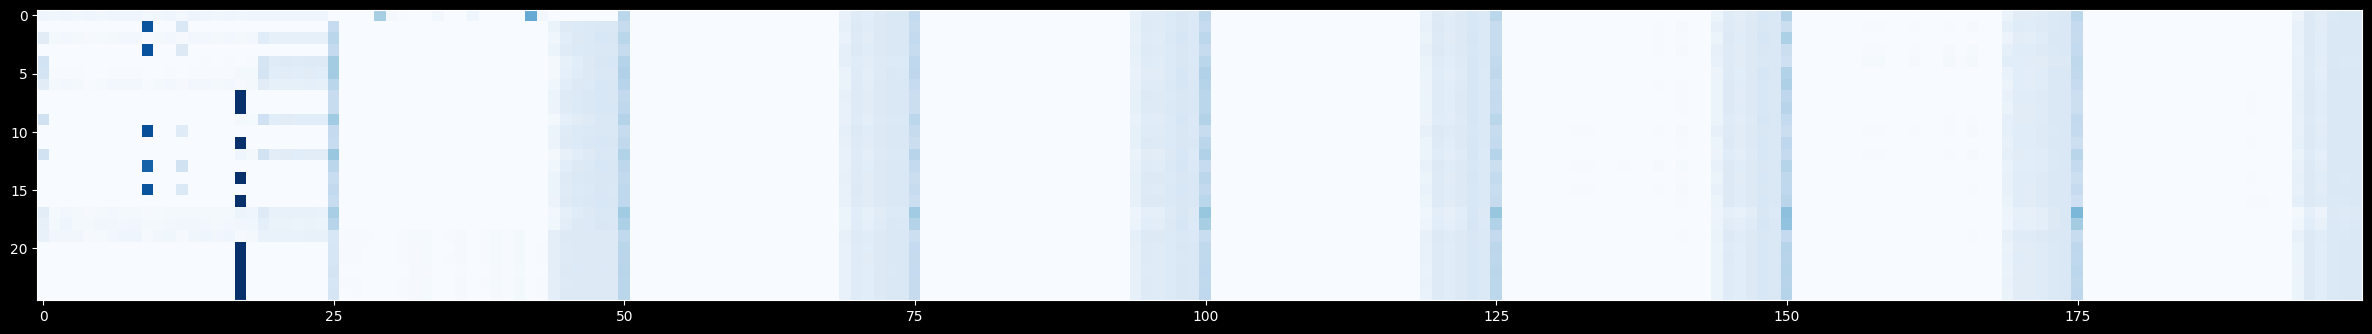

In [3]:
import numpy as np
import matplotlib.pyplot as plt
print(t['attn_map'][0][0].shape)
# plt.imshow(t['attn_map'][0][0])
print(t['input_idx'])
num_box_route = len(t['input_idx'])
num_box = len(t['output_disappear'])
print(t['attn_map'].shape)
att_map = t['attn_map'][0]
att_map = np.concatenate([t for t in att_map],axis=1)
print(att_map.shape)
lena = len(att_map)-1
# print(att_map.shape)
# print(att_map.sum(axis=1))
# print(att_map.sum())

# new = np.zeros((lena+3,lena+3))
# new[1:-1,1:-1]=att_map
# new[0,1] = 1
# new[0,2:2+num_box] = 0.5
# new[0,2+num_box:2+num_box_route] = 0.25
# new[0,2+num_box_route] = 0.1

# new[1,0] = 1
# new[2:2+num_box,0] = 0.5
# new[2+num_box:2+num_box_route,0] = 0.25
# new[2+num_box_route,0] = 0.1

new = att_map

plt.figure(figsize=(30,10))
plt.imshow(new,cmap='Blues')

# TODO: 可视化

In [11]:
import torch
import numpy as np

a = torch.zeros((1,8,53,53))
t = [1,23,4,6,7,52,-1]
x = len(t)
t = torch.tensor(np.array(t))
# t = t[None,None,None].repeat(1,1,x,1)
y = a[:,:,t][:,:,:,t]
# y = a[:,:,t][:,:,:,t]
# print(t.shape)
# y = a[t]
print(y.shape)

torch.Size([1, 8, 7, 7])
